# **TRABALHO DE PROCESSOS ESTOCÁSTICOS**
##_ELETROENCEFALOGRAMA_

**ALUNOS:**
- Victor Pinheiro Matias
- Kelvin Leandro Martins
- Pedro Leinos Falcão Cunha
- Gabriel Vasconcelos Fruet.

**MATRÍCULAS:**
- 538104
- 540006
- 542114
- 537618.

**CURSO:** Engenharia de Computação.

**PROFESSOR:** Charles Casimiro Cavalcante.


# **1. INTRODUÇÃO AO PROBLEMA:**

O eletroencefalograma, conhecido como EEG, é um exame que pode ou não ser invasivo que registra a atividade elétrica do cérebro. Esse procedimento é amplamente utilizado na área médica para auxiliar no diagnóstico e monitoramento de condições neurológicas, como epilepsia, distúrbios do sono e lesões cerebrais. O EEG é realizado por meio de 24 eletrodos fixados no couro cabeludo do paciente, que captam os sinais elétricos produzidos pelas células cerebrais, também chamadas de neurônios.

Contudo, a detecção e diagnóstico da epilepsia por meio do EEG é um processo complexo e desafiador. A epilepsia é um distúrbio neurológico caracterizado por episódios recorrentes e imprevisíveis de atividade cerebral anormal, que resultam em convulsões e outros sintomas. Embora o EEG seja um método fundamental para o diagnóstico de epilepsia, a interpretação dos sinais captados requer conhecimentos especializados e uma compreensão profunda das características do padrão de ondas cerebrais e de estatística.

Existem diversos fatores que contribuem para a complexidade de analisar se um paciente é epiléptico através do EEG. Em primeiro lugar, as atividades elétricas do cérebro são extremamente sutis e podem ser facilmente influenciadas por fatores externos, como movimentos do corpo, estímulos visuais ou sonoros, além do próprio estado de sono do paciente. Esses artefatos obscurecem os padrões de ondas cerebrais relevantes, dificultando a interpretação correta.

Além disso, a epilepsia é uma condição heterogênea, ou seja, existem diferentes tipos de epilepsia com características distintas. Alguns pacientes apresentam atividade epileptiforme clara e evidente no EEG, enquanto outros podem ter sinais mais sutis ou até mesmo resultados normais em determinados momentos ou para determinados eletrodos.

A interpretação do EEG requer a expertise de neurologistas e de eletroencefalografia, que analisam minuciosamente os traçados das ondas cerebrais em busca de anormalidades. Essa análise envolve a identificação de padrões característicos, como ondas lentas, ondas agudas ou complexos de espigas, que podem indicar a presença de atividade epiléptica. No entanto, a interpretação também depende do contexto clínico, histórico do paciente e outros exames complementares.

Portanto, embora o EEG seja uma ferramenta essencial para o diagnóstico e monitoramento da epilepsia, a análise dos resultados requer uma abordagem multidisciplinar, com a combinação de dados clínicos, conhecimentos especializados e a consideração dos diferentes fatores que podem influenciar a atividade elétrica cerebral. Essa complexidade ressalta a importância de contar com profissionais capacitados para a correta interpretação do EEG e o estabelecimento de um diagnóstico preciso.


# **2. METODOLOGIA EMPREGADA:**

          
Nós inicialmente tivemos bastante dificuldade para analisar os dados fornecidos, pois não tínhamos muita clareza de que estávamos analisando, até que então começamos a pesquisar mais sobre o que é um eletroencefalograma e como ocorre um ataque epiléptico. Além disso, conseguimos também conversar com um neuro cirurgião para tirar algumas duvidas sobre o processo de realização e análise do EEG, e o que ocorre com o comportamento cerebral do paciente durante um ataque epiléptico, com essas informações conseguimos iniciar análises mais assertivas.

Descobrimos que é uma prática médica utilizar os eletrodos pares em um hemisfério do cérebro e os ímpares em outro o que ocasiona maior relação entre uns em comparação a outros; que os eletrodos normalmente são analisados em pares, apesar de termos chegados a mesma conclusão com análises individuais, e que tentar analisar vários juntos, pela média ou algo do gênero, acaba ocasionando perda de informações; que durante um ataque epiléptico ocorre fortes variações da atividade elétrica do cérebro que ocasiona fortes e rápidas mudanças no sinal captado pelo EEG e que existem vários tipos de ataque epiléptico e que podem ocorrer de diversas formas desde em só uma área do cérebro até total; que os médicos levam em consideração a existência de um ruído nas análises, que pode ser gerado por diversos fatores desde o próprio couro cabeludo até algum movimento da pessoa durante o exame, que frequências muito próximas de zero e muito maiores que 60hz podem ser descartadas dependendo da forma e tecnologia usadas no procedimento, pois são, segundo o médico, “patológicas ou ruídos” e que as frequências são divididas em áreas sendo elas teta, alpha, beta e delta e que para cada uma dessas é relacionada um comportamento.

Indo para a parte mais estatística das análises precisamos compreender muito bem diversos conceitos abordados em sala de aula mais principalmente os que utilizamos mais profundamente no trabalho que são: transformadas de Fourier e conhecimentos sobre a série de fourier para modelagem de sinal periódico, conceito auto correlação e coeficiente de autocorrelação, o que é e como fazer uma densidade espectral de potência e conceitos mais básicos como o que é e como analisas um histograma e cálculos de variância e média. Mesmo que algumas dessas características estatísticas não nos dissessem muito sobre o sinal, foi importante ter o conhecimento para saber a importância dela nas análises e saber o peso que dá no nosso “diagnóstico final”.


# **3. PREPARAÇÃO DO AMBIENTE**

In [ ]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import matplotlib as mplt

# Definindo um tamanho padrão para as plotagens
plt.rcParams['figure.figsize'] = [8, 8]

In [ ]:
# Fazendo download do dataset
!wget -O normais.zip https://www.dropbox.com/s/k0z4i8khxx55bdk/normais.zip?dl=0
!wget -O epilepticos.zip https://www.dropbox.com/s/wkrpdduhe5k5cph/epilepticos.zip?dl=0
!wget -O desconhecidos.zip https://www.dropbox.com/s/2lf11978bl76n3w/Desconhecidos.zip?dl=0
# Descompactando os dados
!unzip normais.zip
!unzip epilepticos.zip
!unzip desconhecidos.zip

In [ ]:
# Função para impotar os dados

def read_data(fname):
  with open(fname) as f:
    content = f.read()
    electrodes = content.split('\n')[:-1]
    data = np.array([np.asarray(electrode.split()[:5120],dtype=float) for electrode in electrodes])
    return data


In [ ]:
# Importando os dados das 3 classes

normal = np.array([read_data(f'n{i}.dat') for i in range(1,6)])
epileptico = np.array([read_data(f's{i}.dat') for i in range(1,6)])
desconhecido = np.array([read_data(f'd{i}.dat') for i in range(1,4)])

# **4. QUESTÕES:**

Incluímos, junto e ao longo das questões, o código respectivo à cada questão, para criar um relatório mais dinâmico.

## **QUESTÃO 1**
*“Saber para os pacientes desconhecidos a condição de cada um deles (normal ou em ataque epilético) a partir dos dados fornecidos pelos dados do EEG.”*


### **FUNDAMENTOS DA SOLUÇÃO PROPOSTA:**
Para analisarmos a condição dos pacientes duvidosos, nós primeiramente fizemos análises estatísticas dos pacientes saudáveis e epilépticos e com essas informações comparamos com os dados encontrados com os desconhecidos, não conseguimos prever qual a precisão da nossa resposta, pois tendo em vista que aproximadamente 15% de um eletroencefalograma de uma pessoa saudável e epiléptica são praticamente idênticas e tivemos acesso a uma amostragem de apenas 20 segundos e sem saber se as condições de todos os pacientes foram idênticas não conseguimos assegurar . Diante das análises feitas chegamos na conclusão que os procedimentos estatísticos que nós fizemos, que nos fizeram chegar a uma conclusão mais clara foram a plotagem do histograma, a densidade espectral de potência e principalmente o coeficiente de autocorrelação dos eletrodos dos pacientes normais e epilépticos.

Além disso, vale enfatizar que a percepção do grupo foi que existe um padrão diferente entre os epilépticos, que pode se justificar por terem tido convulsão ou não no momento do teste ou o estado emocional do paciente e isso deve ser levado em consideração. Prova disso é a comparação dos resultados estatísticos dos três primeiros pacientes epilépticos, que definimos como padrão 1 com os demais que definimos como padão 2.

Nos histogramas conseguimos ver um padrão de que pessoas epilépticas que possivelmente tiveram algum ataque no momento do teste tem uma base mais comprida do que os normais e que os que possivelmente não tiveram nenhum ataque no momento da medição tem uma base mais achatada que os normais o que é reflexo do comportamento a variância.



### **VARIÂNCIA DOS NORMAIS, EPILÉPTICOS E DESCONHECIDOS**

Iremos plotar as variâncias para enterdemos o comportamento de cada classe.

O eixo x do gráfico indica a pessoa da amostra, o eixo y o eletródo, e o quadrado respectivo, o valor da variância.

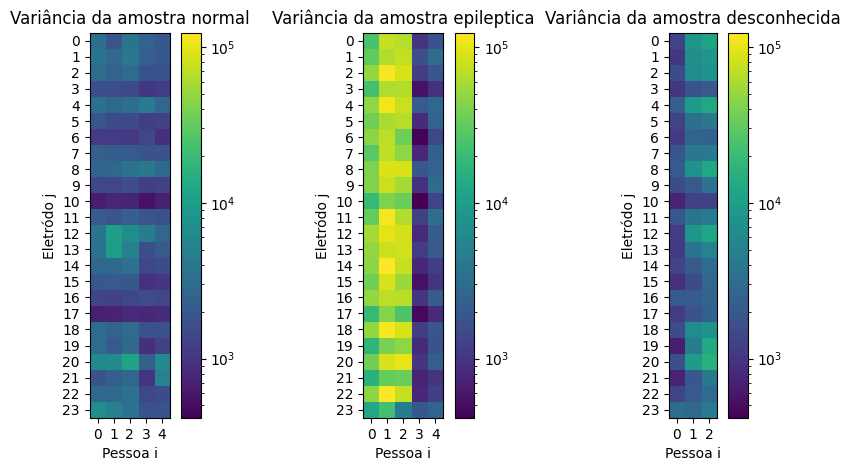

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

dados = list(map(lambda x: x.var(axis=-1), [normal, epileptico, desconhecido]))
nomes = 'Normal Epileptica Desconhecida'.split(' ')

vmin,vmax = min(map(lambda x: x.min(),dados)), max(map(lambda x: x.max(),dados))

for dado, i, nome in zip(dados, range(3), nomes):
  im = ax[i].imshow(dado.T, norm=mplt.colors.LogNorm(vmin=vmin, vmax=vmax),)
  ax[i].set_title(f'Variância da amostra {nome.lower()}')
  ax[i].set_xlabel('Pessoa i')
  ax[i].set_ylabel('Eletródo j')
  ax[i].set_xticks(np.arange(0,len(dado)))
  ax[i].set_yticks(np.arange(0,24))

  fig.colorbar(im, ax=ax[i])

Claramente podemos ver que os epilépticos se distiguem em duas classes, para o escopo desse trabalho definimos o padrão que ocorre da pessoa 0 até a pessoa 2 como padrão 1, já da pessoa 3 e 4 definiremos como padrão 2.

Ademais, percebemos que o variância dos epilépticos de padrão 2 se assemelha bastante a dos normais e que, somente pela variância, não conseguimos distinguir se são normais ou epilépticos, podemos somente dizer que não são epilépticos de padrão 1.

### **HISTOGRAMA**

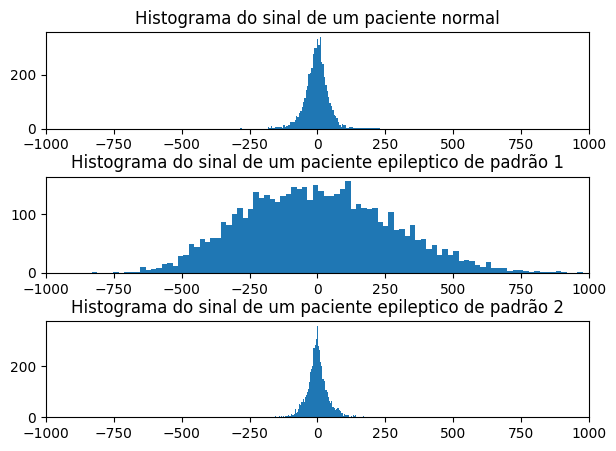

In [ ]:
def potency_spectral_density(signal, fs=256):
  acf = np.correlate(signal, signal, mode="same")
  psd = np.fft.rfft(acf)**2
  frequency = np.fft.rfftfreq(len(acf), d=1/fs)
  return frequency,psd

# Escolhemos os primeiros eletrodos para cada amostra, e colocamos num vetor com tuplas de (rotulo, amostra)
samples = [('Normal', normal[1][0]), ('Epileptico de padrão 1', epileptico[1][0]), ('Epileptico de padrão 2', epileptico[-1][0])]

fig, ax = plt.subplots(3,figsize=(7,5))

for (sample_name, sample), i in zip(samples, range(3)):
  cax = ax[i]
  cax.hist(sample, bins=100)
  cax.set_title(f'Histograma do sinal de um paciente {sample_name.lower()}')
  cax.set_xlim(-1000,1000)

  plt.subplots_adjust(hspace=0.5)




### **DENSIDADE ESPECTRAL DE POTÊNCIA DAS CLASSES**

Para plotar a densidade espectral de potência, utilizamos as funções implementadas pela biblioteca *numpy*, como a implementação da função de autocorrelação, transformada rápida de fourier e outras.

Além disso, como abordado anteriormente, é perceptível dois padrões entre epilépticos, dado isso, iremos plotar um epiléptico para cada padrão.

Iremos somente plotar uma pessoa para cada classe e um eletrodo de cada uma delas, pois os padrões de se repetem ao longo dos eletródos e pessoas das 3 classes definidas.

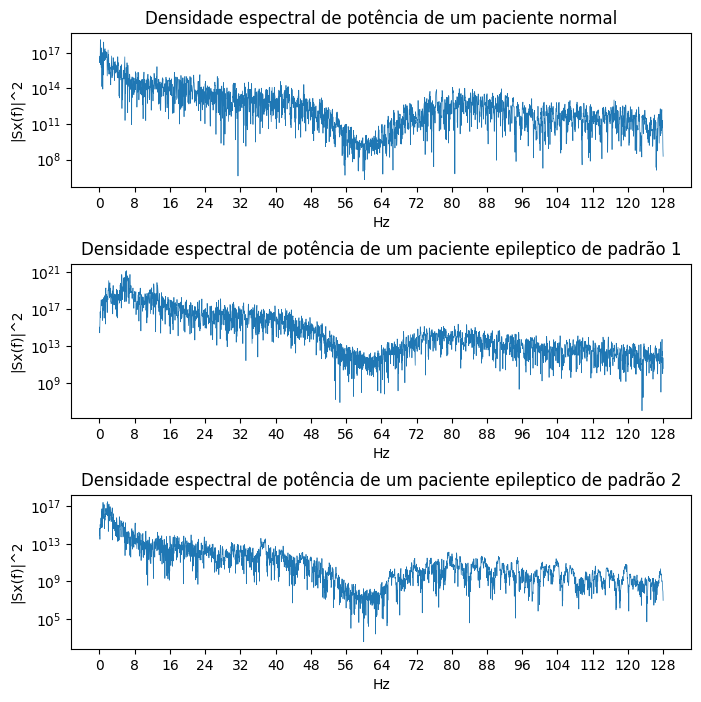

In [ ]:
def potency_spectral_density(signal, fs=256):
  acf = np.correlate(signal, signal, mode="same")
  psd = np.fft.rfft(acf)**2
  frequency = np.fft.rfftfreq(len(acf), d=1/fs)
  return frequency,psd

# Escolhemos os primeiros eletrodos para cada amostra, e colocamos num vetor com tuplas de (rotulo, amostra)
samples = [('Normal', normal[1][0]), ('Epileptico de padrão 1', epileptico[1][0]), ('Epileptico de padrão 2', epileptico[-2][0])]

fig, ax = plt.subplots(3,figsize=(8,8))

for (sample_name, sample), i in zip(samples, range(3)):
  freq, psd = potency_spectral_density(sample)
  cax = ax[i]
  cax.plot(freq,psd, linewidth=0.5)
  cax.set_yscale('log')
  cax.set_ylabel('|Sx(f)|^2')
  cax.set_xlabel('Hz')
  cax.set_title(f'Densidade espectral de potência de um paciente {sample_name.lower()}')
  cax.set_xticks(np.arange(0,132,8))


  plt.subplots_adjust(hspace=0.5)




Percebemos algumas diferenças, vamos lista-las

1. Epilépticos possuem uma maior potência de pico
2. O pico de potência dos epilépticos de classe 1 acontece entre 4 e 8 Hz, diferentemente dos normais, que ocorre em torno de 0 Hz.
3. Os epilépticos de classe 2 possuem um pico de potência entre 0 e 4 Hz.
4. O formato aproximado das 3 DEP's são muito parecidos.

### **FUNÇÂO DE AUTOCORRELAÇÂO**

Seguindo a mesma metodologia da densidade espectral de potência, iremos plotar a autocorrelação da mesma maneira.

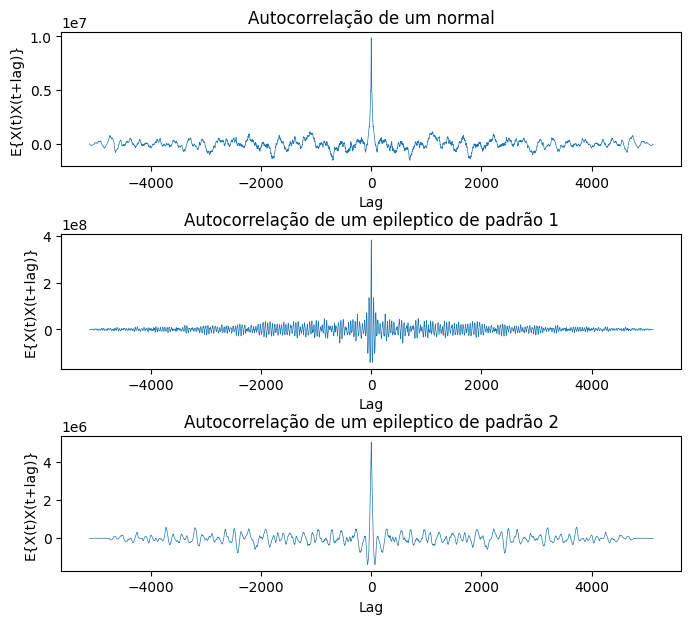

In [ ]:
# Escolhemos os primeiros eletrodos para cada amostra, e colocamos num vetor com tuplas de (rotulo, amostra)
samples = [('Normal', normal[1][0]), ('Epileptico de padrão 1', epileptico[1][0]), ('Epileptico de padrão 2', epileptico[-2][0])]

fig, ax = plt.subplots(3,figsize=(8,7))

for (sample_name, sample), i in zip(samples, range(3)):
  corr = np.correlate(sample,sample,mode="full")
  cax = ax[i]
  cax.plot(np.arange(-5120,5119), corr, linewidth=0.5)
  cax.set_ylabel('E{X(t)X(t+lag)}')
  cax.set_xlabel('Lag')
  cax.set_title(f'Autocorrelação de um {sample_name.lower()}')

  plt.subplots_adjust(hspace=0.5)



Percebemos algumas características, vamos lista-las

1. Pico no 0 como esperado, já que é o momento em que há maior correlação.
2. O sinal é estacionário, pois depende somente da diferença entre instantes e não do tempo em si para definir a correlação.
3. O epiléptico de padrão 1 possui alguma componente com frequência maior em relação aos normais e epilépticos de padrão 2.
4. Os epilépticos de padrão 1 possuem maior valor de pico, com uma ordem de gradeza maior aproximadamente.

### **MAPA DE CALOR DO COEFICIENTE DE CORRELAÇÂO**

Iremos plotar um mapa de calor do coeficiente de correlação entre todos os eletródos de cada paciente, veremos se é possível indentificar algo revelador.

Para facilitar, digitalizamos os coeficientes de correlação, colocando-os em intervalos de buckets.

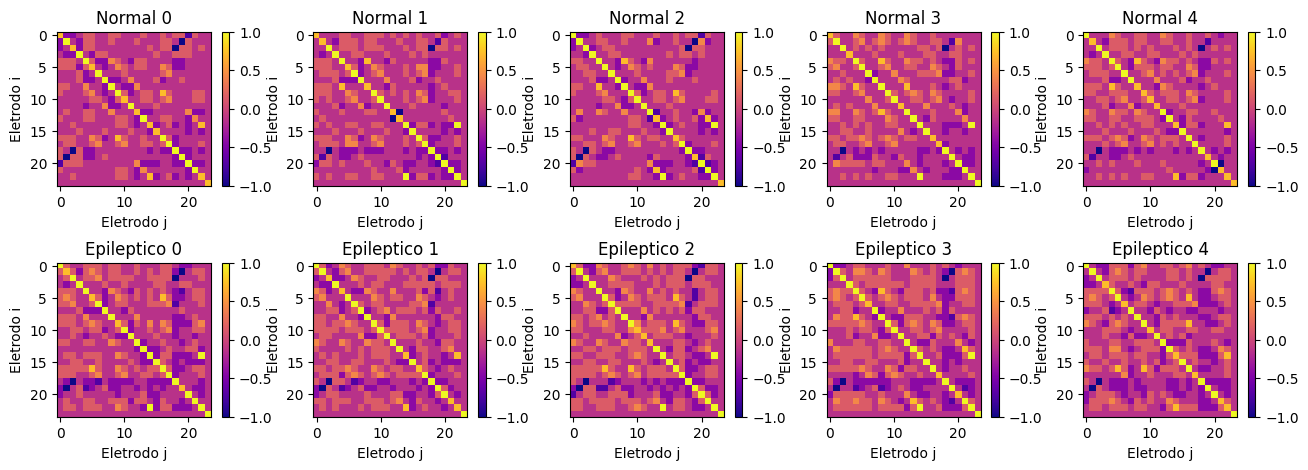

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(16,5))

CMAP = 'plasma'
BINS = np.linspace(-1,1,8)

plt.subplots_adjust(hspace=0.5)
samples = [('Normal', normal), ('Epileptico', epileptico)]

for (sample_name, sample), i in zip(samples,range(2)):
  for j in range(5):
    signal = sample[j]
    corr = np.corrcoef(signal)
    corr_cluster = np.digitize(corr,bins=BINS)
    this_ax = ax[i][j]
    im = this_ax.imshow(BINS[corr_cluster - 1], cmap=CMAP)
    fig.colorbar(im, ax=this_ax)
    this_ax.set_title(f'{sample_name} {j}')
    this_ax.set_ylabel('Eletrodo i')
    this_ax.set_xlabel('Eletrodo j')


Se plotarmos o módulo desse coeficiente, conseguimos perceber mais claramente a difereça

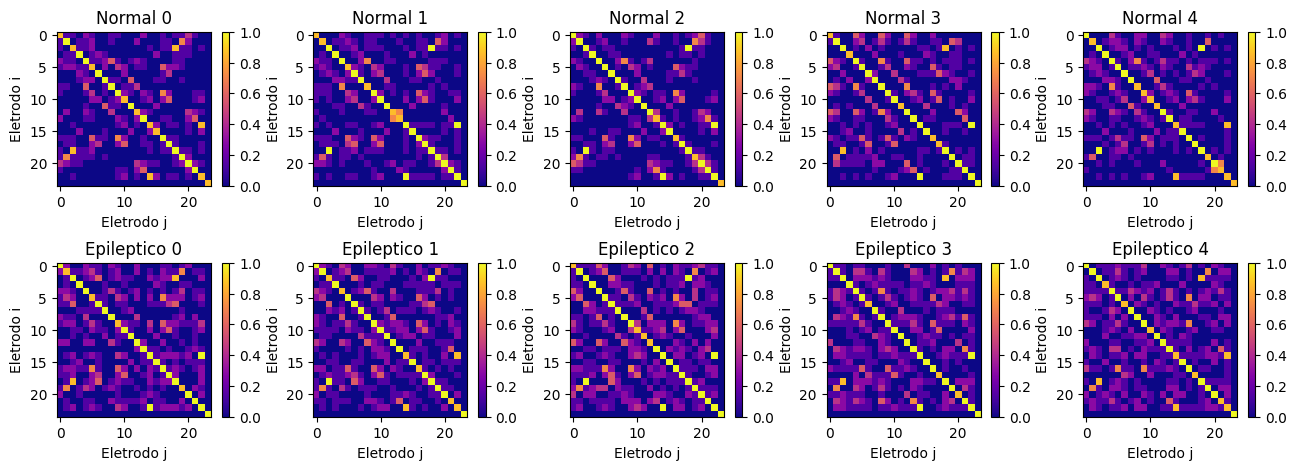

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(16,5))

CMAP = 'plasma'
BINS = np.linspace(0,1,8)

plt.subplots_adjust(hspace=0.5)
samples = [('Normal', normal), ('Epileptico', epileptico)]

for (sample_name, sample), i in zip(samples,range(2)):
  for j in range(5):
    signal = sample[j]
    corr = np.abs(np.corrcoef(signal))
    corr_cluster = np.digitize(corr,bins=BINS)
    this_ax = ax[i][j]
    im = this_ax.imshow(BINS[corr_cluster - 1], cmap=CMAP)
    fig.colorbar(im, ax=this_ax)
    this_ax.set_title(f'{sample_name} {j}')
    this_ax.set_ylabel('Eletrodo i')
    this_ax.set_xlabel('Eletrodo j')


Percebemos algumas características, vamos lista-las

1. Como dito, classificamos os epilépticos em padrão 1 e padrão 2, porém, nesses mapas de calor não conseguimos identificar diferenças claras entre os de padrão 1 (0 a 2) e de padrão 2 (3 e 4).
2. Percebemos uma clara diferença entre normais e epilépticos. Epilépticos possuem eletrodos mais correlacionados(próximos de 1), seja positivamente ou negativamente, enquanto os normais possuem eletrodos mais descorrelacionados(próximos de 0)
3. No primeiro plot, vemos que há uma faixa de correlação negativa nos epilépticos, vista entre os eletrodos 17 e 20.

## **PLOTAGEM DOS DADOS DOS DESCONHECIDOS**

### **DENSIDADE ESPECTRAL DE POTÊNCIA**

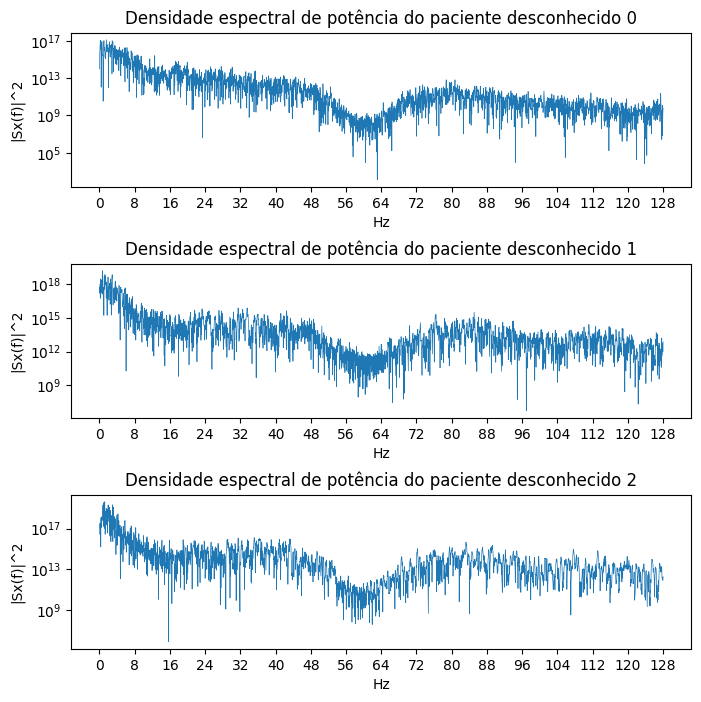

In [ ]:
def potency_spectral_density(signal, fs=256):
  acf = np.correlate(signal, signal, mode="same")
  psd = np.fft.rfft(acf)**2
  frequency = np.fft.rfftfreq(len(acf), d=1/fs)
  return frequency,psd

# Escolhemos os primeiros eletrodos para cada amostra, e colocamos num vetor com tuplas de (rotulo, amostra)
samples = [('Desconhecido 0', desconhecido[0][0]), ('Desconhecido 1', desconhecido[1][0]), ('Desconhecido 2', desconhecido[2][0])]

fig, ax = plt.subplots(3,figsize=(8,8))

for (sample_name, sample), i in zip(samples, range(3)):
  freq, psd = potency_spectral_density(sample)
  cax = ax[i]
  cax.plot(freq,psd, linewidth=0.5)
  cax.set_yscale('log')
  cax.set_ylabel('|Sx(f)|^2')
  cax.set_xlabel('Hz')
  cax.set_title(f'Densidade espectral de potência do paciente {sample_name.lower()}')
  cax.set_xticks(np.arange(0,132,8))

  plt.subplots_adjust(hspace=0.5)



Vemos que todos possuem pico entre 0 e 4, ou seja, podem ser tanto epilépticos de padrão 2 como normais. Porem, especificamente o 3 tem um pico mais longe do 0, que pode indicar ser um epiléptico de padrão 2 como visto anteriormente.

### **CONCLUSÃO PARCIAL 1.**

- Desconhecido 0: Normal ou epiléptico de padrão 2
- Desconhecido 1: Normal ou epiléptico de padrão 2
- Desconhecido 2: Normal ou epiléptico de padrão 2

### **FUNÇÃO DE AUTOCORRELAÇÃO**

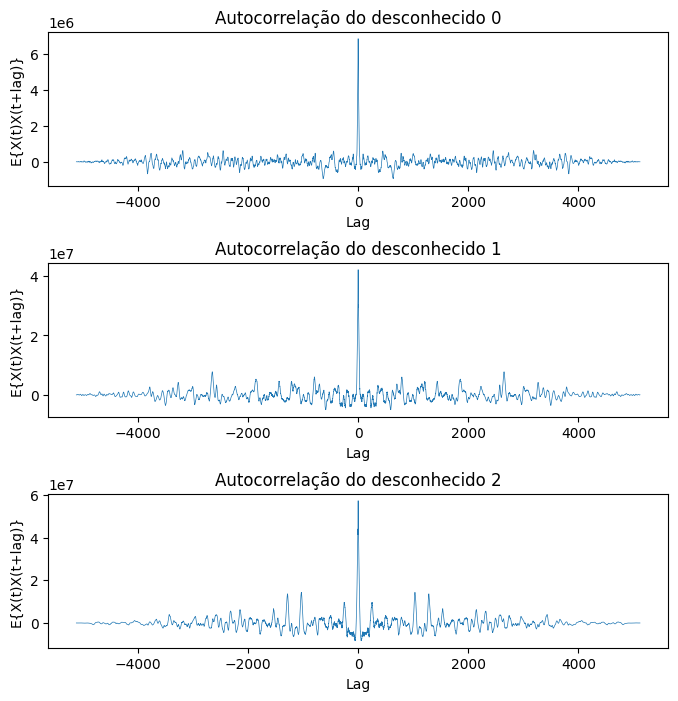

In [ ]:
# Escolhemos os primeiros eletrodos para cada amostra, e colocamos num vetor com tuplas de (rotulo, amostra)
samples = [('Desconhecido 0', desconhecido[0][0]), ('Desconhecido 1', desconhecido[1][0]), ('Desconhecido 2', desconhecido[2][0])]

fig, ax = plt.subplots(3,figsize=(8,8))

for (sample_name, sample), i in zip(samples, range(3)):
  corr = np.correlate(sample,sample,mode="full")
  cax = ax[i]
  cax.plot(np.arange(-5120,5119), corr, linewidth=0.5)
  cax.set_ylabel('E{X(t)X(t+lag)}')
  cax.set_xlabel('Lag')
  cax.set_title(f'Autocorrelação do {sample_name.lower()}')

  plt.subplots_adjust(hspace=0.5)

Vemos que não são ofericidos muitas informações a mais para concluirmos algum diagnóstico diferente de acordo com as diferenciações já abordadas.

### **CONCLUSÃO PARCIAL 2.**

- Desconhecido 0: Normal ou epiléptico de padrão 2
- Desconhecido 1: Normal ou epiléptico de padrão 2
- Desconhecido 2: Normal ou epiléptico de padrão 2

### **MAPA DE CALOR DO COEFICIENTE DE AUTOCORRELAÇÂO**

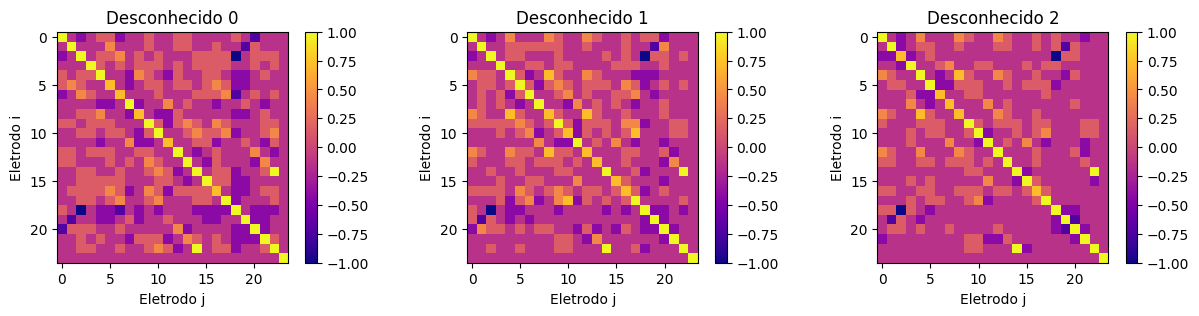

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15,3))

CMAP = 'plasma'
BINS = np.linspace(-1,1,8)

plt.subplots_adjust(hspace=0.5)
samples = [('Desconhecido 0', desconhecido[0]), ('Desconhecido 1', desconhecido[1]), ('Desconhecido 2', desconhecido[2])]

for (sample_name, sample),i in zip(samples,range(3)):
  signal = sample
  corr = np.corrcoef(signal)
  corr_cluster = np.digitize(corr,bins=BINS)
  this_ax = ax[i]
  im = this_ax.imshow(BINS[corr_cluster - 1], cmap=CMAP)
  this_ax.set_title(f'{sample_name}')
  this_ax.set_ylabel('Eletrodo i')
  this_ax.set_xlabel('Eletrodo j')
  fig.colorbar(im, ax=this_ax)


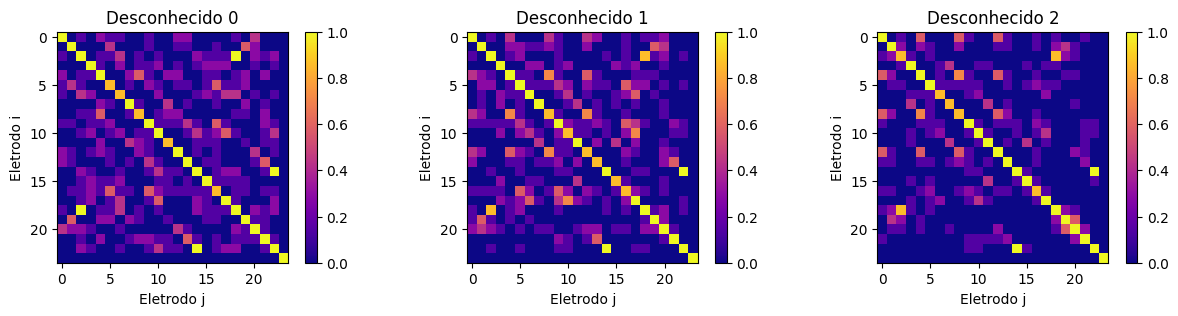

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15,3))

CMAP = 'plasma'
BINS = np.linspace(0,1,8)

plt.subplots_adjust(hspace=0.5)
samples = [('Desconhecido 0', desconhecido[0]), ('Desconhecido 1', desconhecido[1]), ('Desconhecido 2', desconhecido[2])]

for (sample_name, sample),i in zip(samples,range(3)):
  signal = sample
  corr = np.abs(np.corrcoef(signal))
  corr_cluster = np.digitize(corr,bins=BINS)
  this_ax = ax[i]
  im = this_ax.imshow(BINS[corr_cluster - 1], cmap=CMAP)
  this_ax.set_title(f'{sample_name}')
  this_ax.set_ylabel('Eletrodo i')
  this_ax.set_xlabel('Eletrodo j')
  fig.colorbar(im, ax=this_ax)


### **CONCLUSÃO FINAL**

- Desconhecido 0: Epiléptico de padrão 2
- Desconhecido 1: Epiléptico de padrão 2
- Desconhecido 2: Normal

## **QUESTÃO 2**

*“Calcular e plotar (gráfico) a função de autocorrelação dos sinais de EEG dos pacientes desconhecidos É possível inferir algum significado dos sinais que compõem o arquivo iii. a partir de sua função de autocorrelação O que se pode afirmar?”*

### **FUNDAMENTOS DA SOLUÇÃO PROPOSTA:**

Iniciamos as análises fundamentando o conceito de autocorrelação, que é uma medida estatística que avalia a relação entre uma série de dados e suas versões atrasadas no tempo. Em outras palavras, mede o grau de semelhança entre os valores de uma variável em momentos distintos. A autocorrelação é frequentemente usada em análise de séries temporais, como é o caso do eletroencefalograma, e processamento de sinais para identificar padrões, ciclos ou regularidades nos dados.

Fizemos a plotagem dos gráficos da autocorrelação de todos os pacientes e tentamos encontrar padrões para definir a condição dos pacientes desconhecidos, nós notamos algumas características entre alguns dos doentes que não se assemelham a nenhum dos pacientes normais que aqueles com maior variância também tinham frequências mais altas na autocorrelação, e era bem visível que os normais tinham uma frequência menor. Contudo, não conseguimos dizer que essas informações são determinísticas para descoberta do estado do paciente, pois pode ser uma variação de grau de epiléptica do paciente ou até de consequência de ações durante o procedimento, possivelmente com mais pacientes seria possível ter mais segurança .


### **IMPLEMENTAÇÃO DA ESTRATÉGIA DE SOLUÇÃO:**

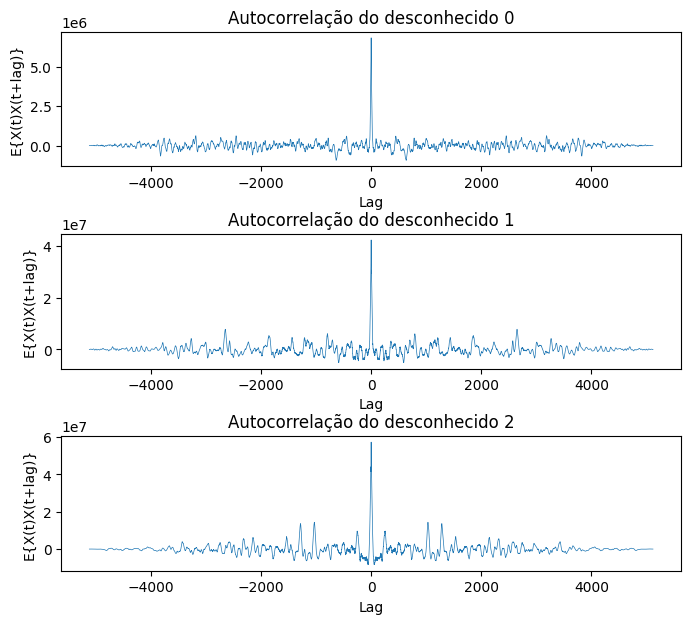

In [ ]:
# Escolhemos os primeiros eletrodos para cada amostra, e colocamos num vetor com tuplas de (rotulo, amostra)
samples = [('Desconhecido 0', desconhecido[0][0]), ('Desconhecido 1', desconhecido[1][0]), ('Desconhecido 2', desconhecido[2][0])]

fig, ax = plt.subplots(3,figsize=(8,7))

for (sample_name, sample), i in zip(samples, range(3)):
  corr = np.correlate(sample,sample,mode="full")
  cax = ax[i]
  cax.plot(np.arange(-5120,5119), corr, linewidth=0.5)
  cax.set_ylabel('E{X(t)X(t+lag)}')
  cax.set_xlabel('Lag')
  cax.set_title(f'Autocorrelação do {sample_name.lower()}')

  plt.subplots_adjust(hspace=0.5)

### **ANÁLISE DOS RESULTADOS:**


Com esses gráficos, concluímos que esse processo é estacionário, pois a função se assemelha a uma função par, mostrando que depende somente da diferença temporal e não dos instantes de tempo

Além disso, percebemos que há algum tipo de periodicidade no sinal, pois a autocorrelação oscila ao longo do eixo de lag, entre valores positivos e negativos, mostrando que há momentos de correlação alta e positiva(como uma defasagem de 0° em um sinal senoidal) e também correlação alta e negativa(como uma defasagem de 90° em um sinal senoidal)

## **QUESTÃO 3**

*“Calcular e plotar a densidade espectral de potência (DEP) dos sinais de EEG dos pacientes desconhecidos (arquivo iii.). O que estes gráficos revelam?”*

### **FUNDAMENTOS DA SOLUÇÃO PROPOSTA:**

A densidade espectral de potência (DEP) é uma medida que descreve como a potência de um sinal está distribuída em diferentes frequências. Ela revela a contribuição relativa de componentes de frequência em um sinal ou processo estocástico. É amplamente utilizada em análise de sinais e engenharia de comunicações. A DEP é calculada usando técnicas de transformada de Fourier, permitindo decompor o sinal no domínio da frequência. Ela fornece informações sobre a largura de banda, frequências dominantes, características de ruído e outras propriedades espectrais do sinal. Estudando sobre as frequências do cérebro descobrimos que existem frequências atreladas a diferentes momentos do comportamento humano que são:


Ondas Delta (0,5 a 4 Hz): São as ondas mais lentas e de maior amplitude. Elas estão associadas ao sono profundo, anestesia geral e estados de coma.

Ondas Teta (4 a 8 Hz): São ondas de frequência média. Elas estão relacionadas ao sono REM (movimento rápido dos olhos), meditação profunda, relaxamento e também podem ser observadas em algumas formas de transe.

Ondas Alfa (8 a 12 Hz): São ondas de frequência intermediária. Elas estão presentes quando uma pessoa está em um estado de relaxamento tranquilo, com os olhos fechados, mas ainda acordada. Também são observadas durante meditação e visualização.

Ondas Beta (12 a 30 Hz): São ondas de frequência mais rápida. Elas estão associadas a um estado de vigília e atividade mental ativa. As ondas betas podem ser subdivididas em:
- Ondas Baixa Beta (12 a 15 Hz): Estão relacionadas ao estado de relaxamento e atenção focada.
- Beta Média (15 a 20 Hz): Estão associadas ao estado de alerta e atividade mental mais intensa.
- Ondas Alta Beta (20 a 30 Hz): São observadas em situações de estresse, ansiedade e excitação.

Ondas Gama (acima de 30 Hz): São as ondas de frequência mais alta e estão relacionadas a processos cognitivos superiores, como a percepção sensorial, memória de trabalho, atenção e consciência.

Como não tínhamos informações de como foi feito o EEG e se todos os pacientes passaram pelo mesmo processo e estavam com as mesmas condições, tentamos achar uma análise mais genérica dos espectros de frequência.


### **IMPLEMENTAÇÃO DA ESTRATÉGIA DE SOLUÇÃO:**

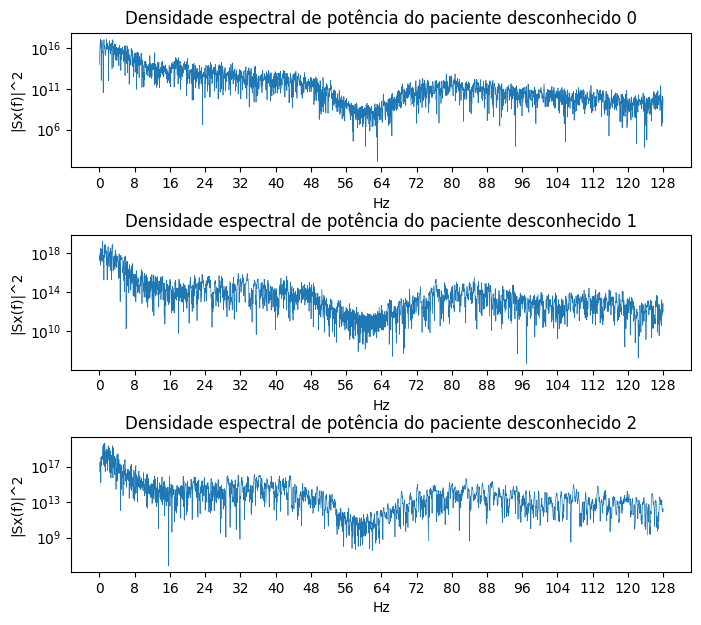

In [ ]:
def potency_spectral_density(signal, fs=256):
  acf = np.correlate(signal, signal, mode="same")
  psd = np.fft.rfft(acf)**2
  frequency = np.fft.rfftfreq(len(acf), d=1/fs)
  return frequency,psd

# Escolhemos os primeiros eletrodos para cada amostra, e colocamos num vetor com tuplas de (rotulo, amostra)
samples = [('Desconhecido 0', desconhecido[0][0]), ('Desconhecido 1', desconhecido[1][0]), ('Desconhecido 2', desconhecido[2][0])]

fig, ax = plt.subplots(3,figsize=(8,7))

for (sample_name, sample), i in zip(samples, range(3)):
  freq, psd = potency_spectral_density(sample)
  cax = ax[i]
  cax.plot(freq,psd.real, linewidth=0.5)
  cax.set_yscale('log')
  cax.set_ylabel('|Sx(f)|^2')
  cax.set_xlabel('Hz')
  cax.set_title(f'Densidade espectral de potência do paciente {sample_name.lower()}')
  cax.set_xticks(np.arange(0,132,8))

  plt.subplots_adjust(hspace=0.5)



### **ANÁLISE DOS RESULTADOS:**
Podemos perceber que a maior concentração de frequências está entre 0 e 10Hz e que vai iminuindo até a menor em torno de 60Hz e que em geral os gráficos se comportam de forma bem semelhante em todos os pacientes, o que faz sentido levando em consideração as características do corpo humano. Além disso, Frequências mais altas são normalmente associadas a artefatos, ruídos ou interferências externas.
No entanto, é importante mencionar que existem técnicas eletrofisiológicas mais avançadas, como o EEG de alta densidade ou o EEG de banda larga, que podem capturar frequências mais altas. Essas técnicas podem ser úteis em pesquisas específicas ou em contextos clínicos mais especializados. Como não temos a informações mais precisas de como foi feito o eletroencefalograma e as circuntâncias dos pacientes, julgamos não ser possível chegar a conclusões de diagnósticos apenas com as informações fornecidas.
Portanto, apesar de notarmos que comparando os pacientes normais e epilépticos existe uma certa diferença na concentração de frequência, para nós com as informações dadas a DEP pode auxiliar em um diagnóstico, mas não ser determinante.


# **QUESTÃO 4**

*“Os dados de EEG podem ser vistos como processos estocásticos? Possuem suas distribuições de probabilidade bastante definidas? Identifique as principais características dos sinais nos arquivos I, II, III, depois gere variáveis aleatórias que emulam o comportamento estatístico dos sinais. Verifique se eles teriam alguma "inteligibilidade" Porque?”*


### **FUNDAMENTOS DA SOLUÇÃO PROPOSTA:**

Começamos definindo o que é um processo estocástico: modelo matemático que descreve a evolução de uma variável aleatória ao longo do tempo. Suas características principais são: natureza aleatória das observações, impossibilidade de prever com certeza os resultados futuros; dependência temporal, em que as observações são influenciadas por valores anteriores; e variações e flutuações imprevisíveis ao longo do tempo. Essas características refletem a incerteza e a aleatoriedade presente no processo estocástico, tornando-o uma ferramenta fundamental para modelar fenômenos complexos e comportamentos que não podem ser determinísticos ou previsíveis de forma exata.

Além disso, vale enfatizar que uma distribuição de probabilidade é uma função matemática que descreve a probabilidade de ocorrência de diferentes resultados ou eventos em um experimento aleatório. Ela atribui probabilidades a cada possível resultado, indicando a chance relativa de que um determinado resultado ocorra. Essa função pode ser expressa de diferentes maneiras, dependendo do tipo de distribuição e das variáveis envolvidas.

Uma distribuição de probabilidade é caracterizada por propriedades como média, variância, desvio padrão e forma do seu gráfico. Existem várias distribuições de probabilidade amplamente utilizadas, como a distribuição normal (ou gaussiana), a distribuição de Poisson, a distribuição binomial, a distribuição exponencial, entre outras. Cada uma delas é aplicada a diferentes tipos de problemas e experimentos, dependendo das características dos dados e do contexto em questão.

Para a construção do gerador de variáveis aleatórias, vimos que a transformada de Fourier dos sinais de EEG se comportavam de uma forma de onda periódica subamortecida que para análises de circuitos elétricos com indutores e capacitores se comporta da seguinte forma:

$x(t) = B_1 e^{−α t }cos(\omega d t)+ B_2 e^{ −α t }sin (\omega d t)$

Além disso, usamos como base nosso conhecimento de série de fourier que é utilizada para modelagem de sinais periódicos que é basicamente um somatório infinito de senos e cossenos, sabendo disso já sabíamos da possibilidade da modelagem e bastou alguns testes para nos aproximarmos, seguindo essa ideia de equação começamos a tentar modelar adicionando componentes frequências diferentes e ruídos até que chegássemos na equação encontrada que é a mais próxima que conseguimos da realidade:



### **TRANSFORMADA DE FOURIER DE 3 AMOSTRAS**

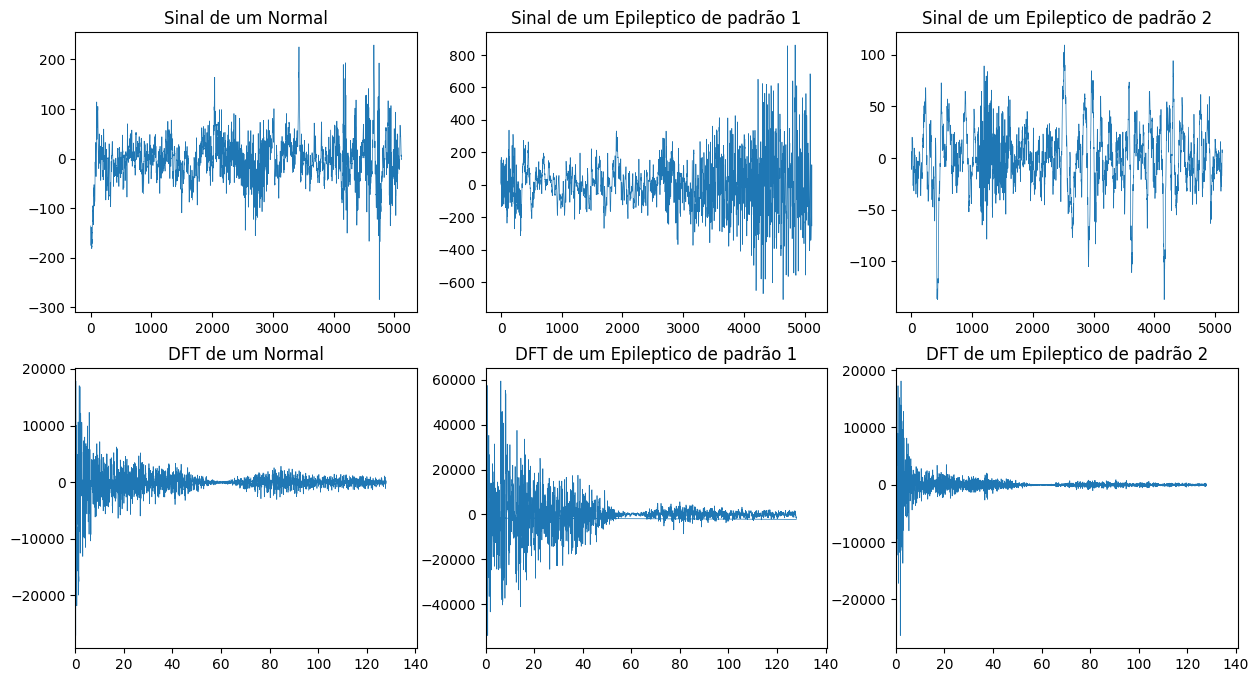

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(15,8))

samples = [('Normal', normal[1][0]), ('Epileptico de padrão 1', epileptico[0][0]), ('Epileptico de padrão 2', epileptico[-2][0])]

i = 1
for (sample_name, sample), j in zip(samples, range(3)):
  cax = ax[i][j]
  sigfft = np.fft.fft(sample)
  fftfreq = np.fft.fftfreq(5120, 1/256)

  cax.plot(fftfreq,sigfft,linewidth=0.5)
  cax.set_xlim(0)
  cax.set_title(f'DFT de um {sample_name}')

i = 0
for (sample_name, sample), j in zip(samples, range(3)):
  cax = ax[i][j]
  cax.plot(sample,linewidth=0.5)
  cax.set_title(f'Sinal de um {sample_name}')




### **SINAL MODELADO**

A transformada de fourier do sinal foi modelado atraves de uma função com duas componentes de frequência, da forma:

$exp(-x)*A + B + NOISE) * (cos(x \omega_1) + sin(x \omega_2)$

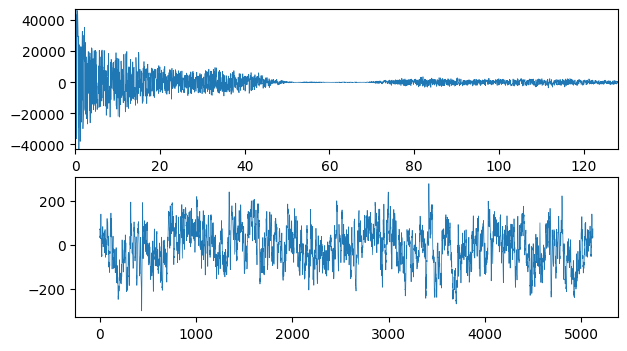

In [ ]:
fig, ax = plt.subplots(2,figsize=(7,4))
x = np.linspace(0,128,2560)
freq1 = np.pi/120
freq2 = np.pi/15
inversor_rv1 = np.random.binomial(1, 0.5, size=2560)*2 - 1
inversor_rv2 = np.random.binomial(1, 0.5, size=2560)*2 - 1
gauss_wn1 = np.random.randn(2560)*6000
gauss_wn2 = np.random.randn(2560)*6000
y1 = (np.exp(-(x/2))*3e4 + 1e4 + gauss_wn1) * (np.cos(x*freq1) + 0.2*np.sin(x*freq2)) * np.exp(-x/50) * inversor_rv1
y2 = (np.exp(-(x/2))*3e4 + 1e4 + gauss_wn2) * (np.cos(x*freq1) + 0.2*np.sin(x*freq2)) * np.exp(-x/50) * inversor_rv2
ax[0].plot(x,y1,linewidth=0.5)
ax[0].margins(x=0,y=0)
real_y = np.r_[y1,y1[::-1]]
imag_y = np.r_[y2,y2[::-1]]
sinal_criado = np.fft.ifft(real_y + 1j*imag_y).real
#ax[1].plot(real_y + 1j*imag_y,linewidth=0.5)
ax[1].plot(np.fft.ifft(real_y + 1j*imag_y).real ,linewidth=0.5)

### **AUTOCORRELAÇÃO**

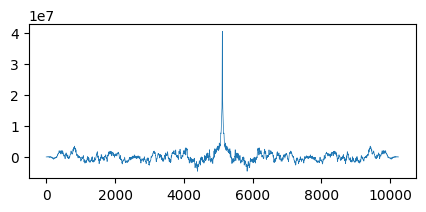

In [ ]:
fig, ax = plt.subplots(1,figsize=(5,2))
ax.plot(np.correlate(sinal_criado,sinal_criado,mode="full").real,linewidth=0.5)

### **ANÁLISE DOS RESULTADOS:**

Chegamos à conclusão que, como afirmado e explicado anteriormente, o eletroencefalograma (EEG) pode ser considerado um processo estocástico, pois captura a natureza aleatória, imprevisível e complexa da atividade cerebral. A atividade cerebral é influenciada por vários fatores, resultando em sinais elétricos imprevisíveis produzidos por um grande número de neurônios. Ao registrar um EEG, obtém-se uma sequência de amostras ao longo do tempo, onde cada amostra representa a atividade elétrica em um momento específico, essas amostras podem ser tratadas como variáveis aleatórias, pois são resultados aleatórios dependentes do estado atual do cérebro e de eventos passados.

Além disso, chegamos a conclusão que um EEG não possui uma distribuição de probabilidade única e definida, pois a atividade cerebral registrada pode variar consideravelmente de pessoa para pessoa e até mesmo dentro de um mesmo indivíduo em diferentes momentos. A distribuição de probabilidade associada a um eletroencefalograma é influenciada por vários fatores, como a idade, o estado de saúde, o estado emocional, a presença de distúrbios neurológicos, entre outros. Ademais, durante certos eventos cerebrais, como convulsões, existem características distintas no EEG que podem ter distribuições de probabilidade específicas associadas a esses eventos.

A respeito das caracteristicas dos arquivos, as principais características de cada um dos arquivos foram abordadas durante as explanções das questões anteriores, desde padrões de variância até comportamento de frequências.

Dessa forma, de acordo com o abordado no projeto e a explicação do sinal gerado, apesar de ser possível gerar um sinal periódico infinito que se aproxime de um sinal de EEG, o sinal gerado é relativamente pouco inteligível como um sinal de EEG, já que é somente uma aproximação usando funções e não seria possível chegar a conclusões de um estado de um paciente com ela. No entanto, vale ressaltar, conforme anteriormente afirmado existem certos padrões de atividade cerebral, como as ondas alfa, beta, delta e teta, exibem características estatísticas comuns que podem ser aproximadas por distribuições de probabilidade específicas.


# **5. CONCLUSÃO:**

Diante do exposto, concluímos que as questões levantadas foram realizadas com êxito e o propósito deste trabalho em relação a análise estatística do eletroencefalograma foi alcançado. Exploramos a importância do EEG como uma ferramenta fundamental no diagnóstico e monitoramento de condições neurológicas, com foco na epilepsia. Reconhecemos a complexidade da análise dos resultados do eletroencefalograma, devido à sutileza das atividades cerebrais e à heterogeneidade da epilepsia e importância do conhecimento técnico do processo para o entendimento dos dados coletados e do conhecimento teórico de processos estatísticos para modelar e organizar de forma mais visual. No entanto, ressaltamos a necessidade de profissionais especializados na interpretação dos traçados e na consideração de fatores clínicos relevantes para alcançar resultados mais claros e precisos. Compreender as limitações e nuances do EEG é crucial para um diagnóstico preciso e um cuidado adequado aos pacientes com epilepsia.
